# **Bank Marketing DataSet - Intelligent Targeting**

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

**Segment of the Population:** To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

**Distribution channel to reach the customer's place:** Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

**Promotional Strategy:** This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

**You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?**

## Data Description

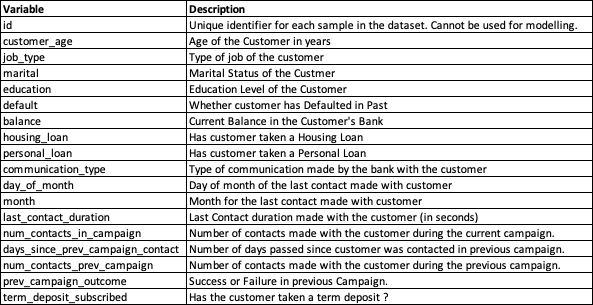

### **Hypothesis Generation**


* Are younger customers more likely to subscribe to a term deposit as compared to old customers ?

* Are people with a higher bank balance more likely subscribe to term deposit than people with low balance ?

* Does a married person have higher chances to subscribe to a term deposit compared to a single or divorced person ? 

* Does the length of the call made to the customers tell us anything about their chances of subscribing ?
(One may think that if the call length is longer, the customer executive has spent a longer time, discussing details with customer, hence the customer is more likely to subscribe).

* does customer with higher educational level have higher balance ?

* does customer who have taken Loans( personal or/and home ) are less likely to subscribe?

* does the customer with more number of contacts during the campaign are more likely to subscribe? 
this is due to the fact company contact more who shows interest in the subscription .


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import missingno as msn
import warnings
warnings.simplefilter('ignore')

In [5]:

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#from lightgbm import LGBMClassifier





In [21]:
def calculate_missing_value_info(df):
    missing=pd.DataFrame()
    percentage=[]
    count=[]
    total_record=len(df)
    for feature in df.columns:
        cnt=df[feature].isna().sum()
        cal=cnt/total_record
        percentage.append(cal*100)
        count.append(cnt)
    missing['feature']=df.columns
    missing['count of missing values']=count
    missing['missing %']=percentage
    missing.sort_values(by='missing %',ascending=False,inplace=True)
    missing.index=range(1,len(missing)+1)
    return missing

#### Lets read Train and Test data into pandas dataFrame train & test repectively

In [6]:
train = pd.read_csv('Train_eP48B9k.csv')
test = pd.read_csv('Test_jPKyvmK.csv')

### Brief Look at our data 

In [8]:
train.head(10)


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [9]:
train.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0
31646,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,183.0,10.0,NaN,0,unknown,0


#### samples and variables

In [12]:
print('Train data_set has {} sample & {} variables'.format(train.shape[0],train.shape[1]))
print('Test data_set has {} sample & {} variables'.format(test.shape[0],test.shape[1]))

Train data_set has 31647 sample & 18 variables
Test data_set has 13564 sample & 17 variables


#### all variables

In [24]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

#### data_types of variables

In [14]:
train.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

#### observation excluding id and target variable:
1. Numerical datatype variables:
    customer_age,balance,day_of_month,num_contacts_in_campaign, days_since_prev_campaign_contact,
    num_contacts_prev_campaign
2. Rest are string type

In [22]:
calculate_missing_value_info(train)

,feature,count of missing values,missing %
1,days_since_prev_campaign_contact,25831,81.622271
2,customer_age,619,1.955952
3,balance,399,1.260783
4,last_contact_duration,311,0.982716
5,marital,150,0.473979
6,personal_loan,149,0.470819
7,num_contacts_in_campaign,112,0.353904
8,id,0,0.000000
9,month,0,0.000000
10,prev_campaign_outcome,0,0.000000


* all varible has quite less and managable amount of missing variable except one variable 
days_since_prev_campaign_contact ,here we assume that these customers are new and hence has not being contacted 
for any campaign . we will test this hypothsesis and if fail to hold,we will drop this in further analysis

In [23]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

observation:

   1. continuous feature :
        * customer_age,
        * balance,
        * last_contact_duration,
        * num_contacts_in_campaign,
        * days_sence_prev_campaign,
        * num_contacts_in_campaign
   2. Categorical feature:
        1. Nominal :
            * marital,
            * default,
            * housing_loan,
            * personal_loan,
            * month,
            * communication_type,
            * perv_campaign
            * job_type,
        2. ordinal :
            * education,



# **EDA**

### **Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: 

2. Bivariate:





### Segregating Categorical & Numerical Variables

In [30]:
categorical = ['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome',
'term_deposit_subscribed']

### **Categorical Features**

#### **Univariate Analysis - Pie Charts. **


In [33]:
len(categorical)

10

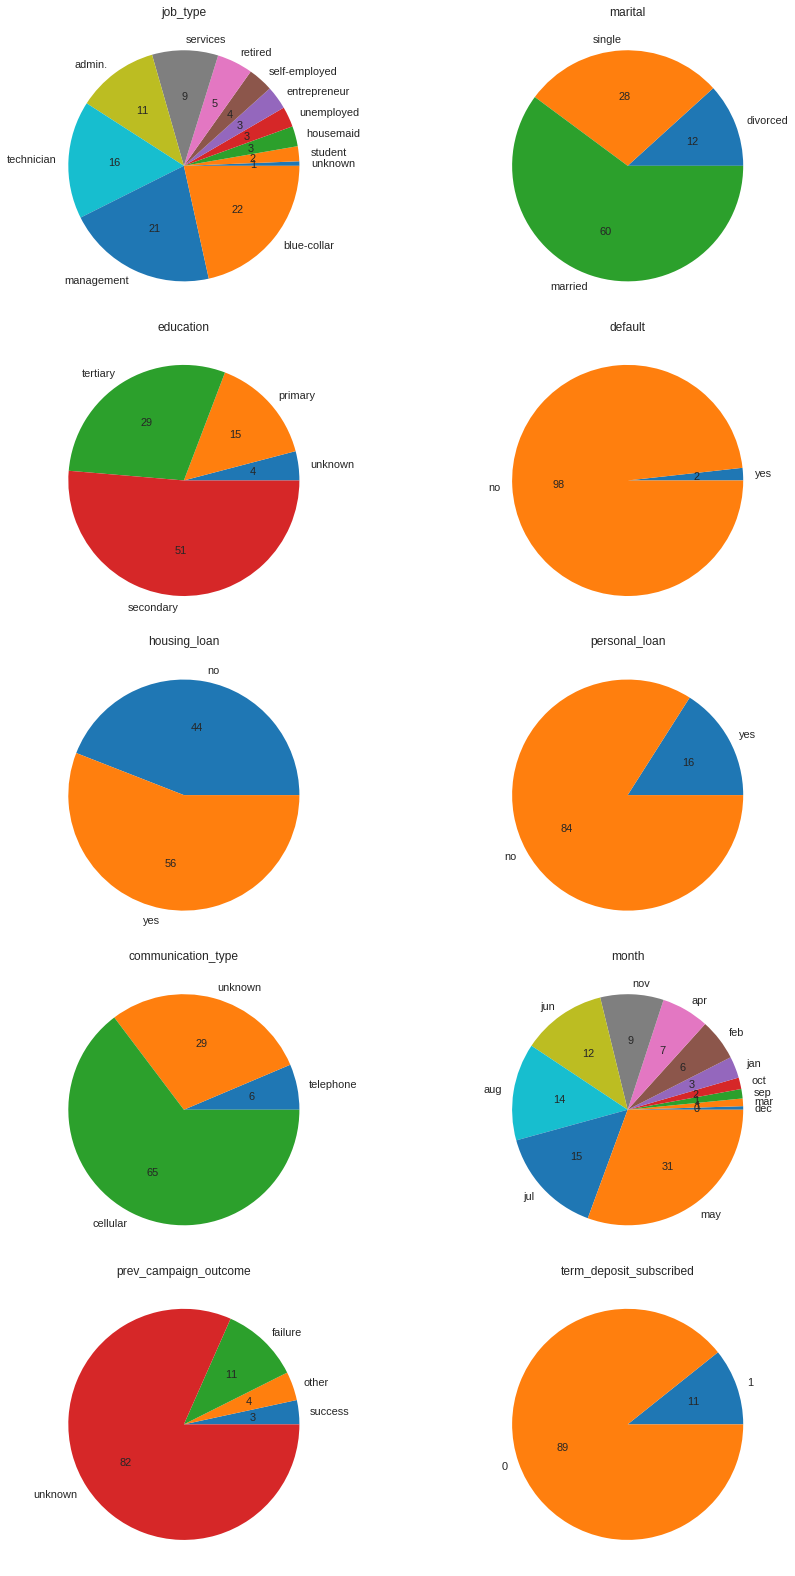

In [56]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes=[column for row in axes for column in row]

for i, c in enumerate(categorical):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=11)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### **Univariate Analysis - CountPlots**


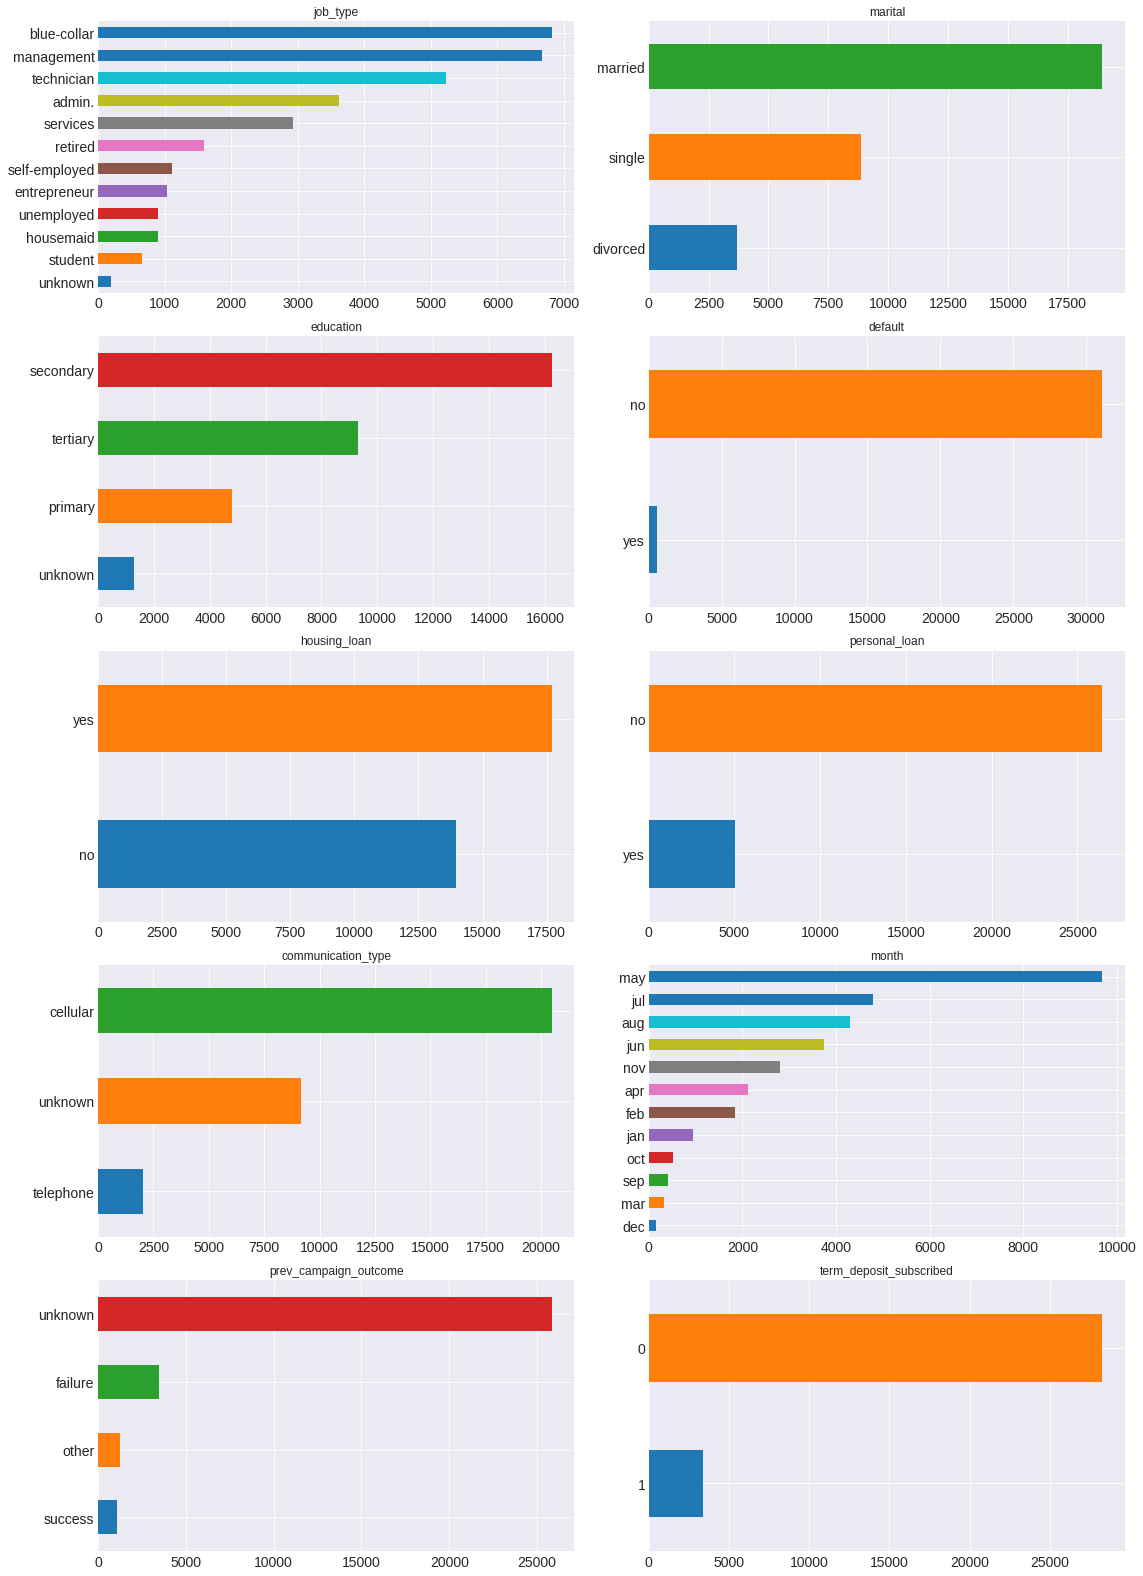

In [51]:
fig, axes = plt.subplots(5, 2, figsize=(16, 22))
axes=[column for row in axes for column in row]

for i, c in enumerate(categorical):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

#### Observations

1. Only 11 % (approx) customers had subscribed to term deposits
    * Quite obviously dataset is very imbalanced. Only about 10 % of the examples are positive.
2. 85% (approx) of the customer  taken personal loan
3. 61% (approx) of the customers are married
4. 51% (approx) of the customers  have studied senior secondary as highest qualification
5. 2 % of the customers defaulted in the past
6. prev_campaign_outcome has nearly 82% unknown data ,
    * this can be seen in relation with the hypothesis we build for variable days_since_prev_campaign_contact
      the % of unknown data in prev_campaign_outcome is approximately equal to to missing values in  days_since_prev_campaign_contact
    * this is quite expected since for new customers.

In [69]:
target='term_deposit_subscribed'

### Bivariate Analysis Relationships with Target

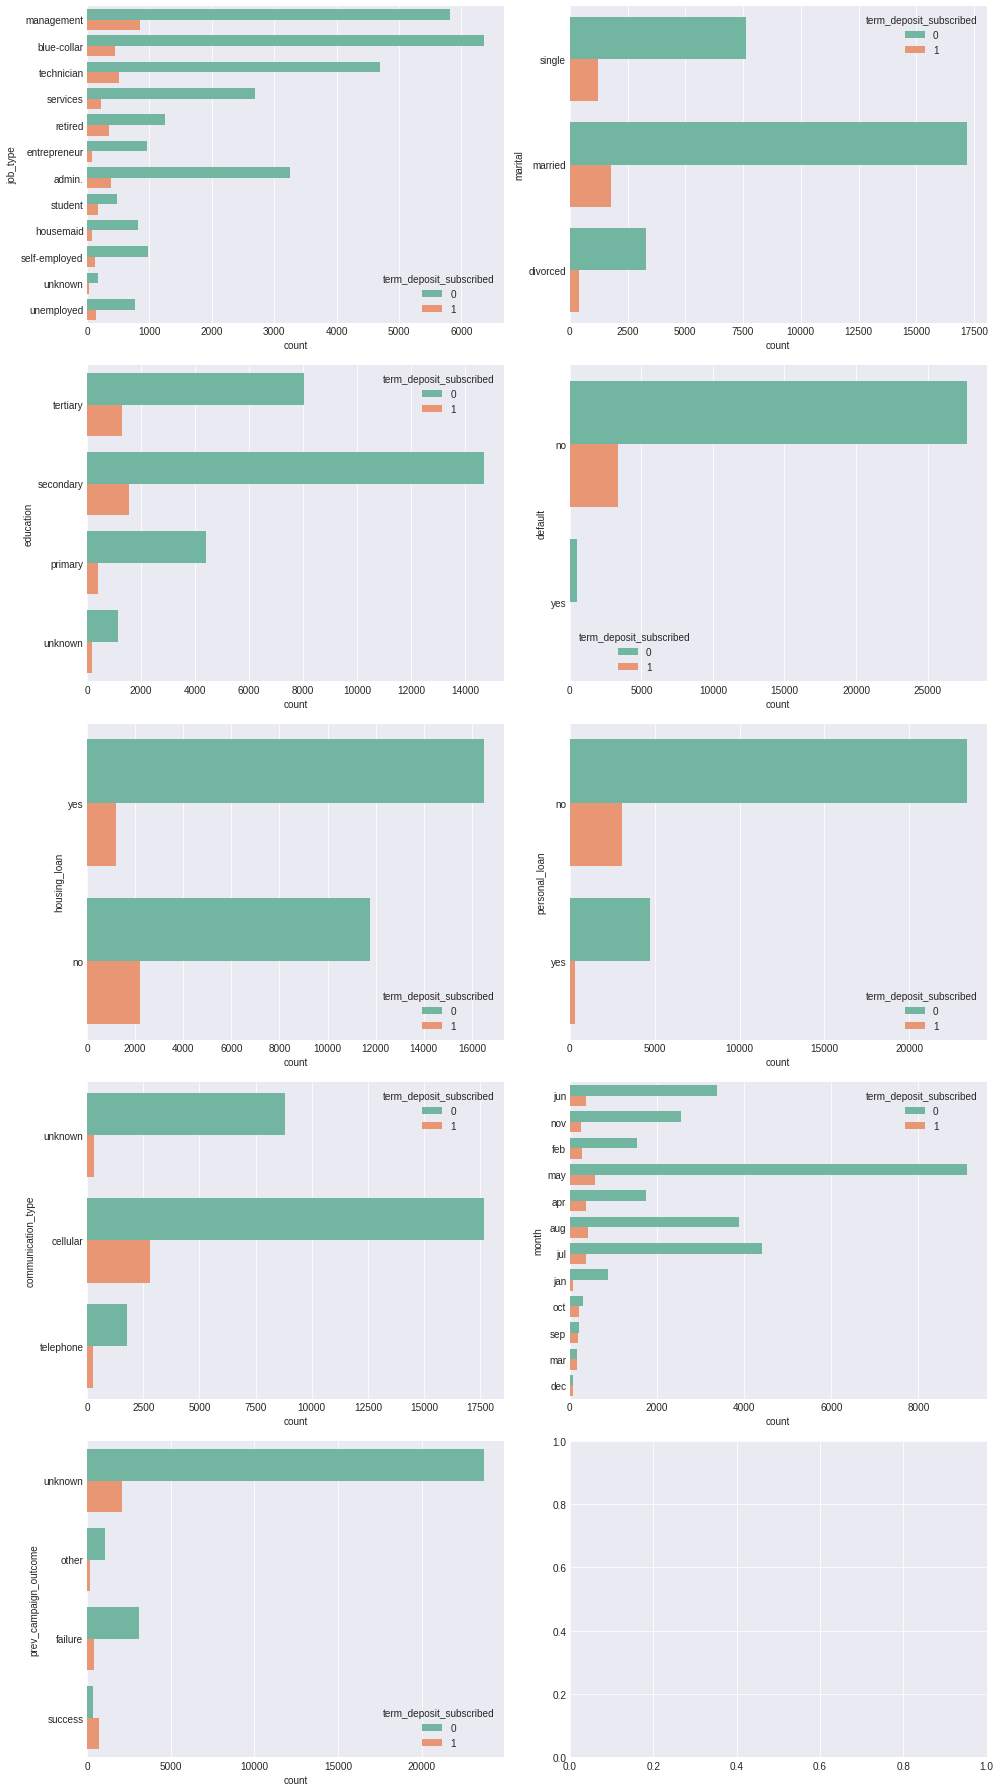

In [89]:
fig,axes=plt.subplots(5,2,figsize=(14,25))
axes=[column for row in axes for column in row]
for pos,feature in enumerate(categorical):
    if feature!=target:
        sns.countplot(data=train,y=feature,ax=axes[pos],hue=target,palette="Set2")
        #axes[pos].title()
_=plt.tight_layout()

#### Observations:
1. Customer who defaulted in past ,has nearly no possibility to subscribe ,and this what we can expect 
2. It is evident from the plot ,that a customer with any kind of loan(housing or/and personal)  is less likely to subscribe to its counter 
part . 


**Q. Do married people have more chances of subscribing to a term deposit ?**


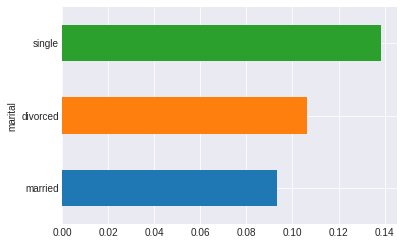

In [101]:
_ = train.groupby('marital')[target].mean().sort_values().plot(kind = 'barh')

The data tells us quite a different story than our initial thought process, single people are the more likely to subscribe to a term deposit. 

#### **Numerical Features**

##### 1. **Univariate Analysis - Boxplots**

Boxplot can be used to see the spread of the numerical variables, and identify outliers

https://en.wikipedia.org/wiki/Box_plot


In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

##### **2. Univariate Analysis - Density Plots**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

##### **3. Bivariate Analysis KDE plots - Relationships with Target Variable**.

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

##### **4. Bivariate Analysis - Horizontal BarPlots**

For each numerical Variable. We will plot the median of the numerical variable for:


1. When term_deposit_subscribed == 0
2. when term_deposit_subscribed == 1

**We are choosing median since median is not affected by outliers**, and our data has a lot of outlers

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

**Q. Do people with a higher bank balance more likely subscribe to term deposit than people with low balance ?**

In [ ]:
_ = train.groupby(TARGET_COL)['balance'].median().plot(kind = 'barh', title=f'Median_balance')

If you see the plot above median balance of customers not subscribing to a term deposit is around 400 whereas median balance of customers subscribing to a term deposit is 800. This definitely supports our initial hypothesis.

**Q. Does the length of the call made to the customers tell us anything about their chances of subscribing ?**

In [ ]:
_ = train.groupby(TARGET_COL)['last_contact_duration'].median().plot(kind = 'barh', title=f'Median_last_contact_duration')

From the plot above median last_call_duration made to the customers not subscribing to a term deposit is around 150 seconds. Median last_call_duration made to the customers subscribing to a term deposit is around 450 seconds. So yes our hypothesis seems true.

**Q. Are younger customers more likely to subscribe to a term deposit compared to old customers ?**

It's not very clear from our above plot since we have median age of around 40 for both cases

Lets dig deeper.

We will define:
 old as Age > 60
 Not Old as Age <= 60

In [ ]:
train['is_old'] = True
train.loc[train['customer_age'] <= 50, 'is_old'] = False

_ = train.groupby('is_old')[TARGET_COL].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

Looks like old age customers are definitely more likely to subscribe to a term deposit compared to younger age customers

##### **5. Bivariate Analysis - Correlation Heatmaps**

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

**Exercise**

What are the more interesting things you can find from this correlation plot ? 

1. EDA has a structure but it is also an art
2. Its not about how beautiful the plots are
3. EDA is the backbone of any ML project for structured data

**Next steps for EDA: Ideas and Suggestions.**

This was a basic EDA, to demonstrate its purpose. However the data contains a lot more hidden information. EDA has no end, and as we dig deeper into the data, we are sure to find more meaningful and interesting insights.

1. **Do a multivariate Feature Analysis**. Here we only have taken a look at each of the features and its relationship with the target variable, or relationship betwen two features. But can two or more features together influence the target more ?

2. **Dig deeper into more important features**. This can be done with the help of Feature Importance Scores. In the next section we will see how to create a baseline model and get feature importances.

# Metric and Baseline Model

**F1 Score**


In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.

The F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 

https://en.wikipedia.org/wiki/F1_score

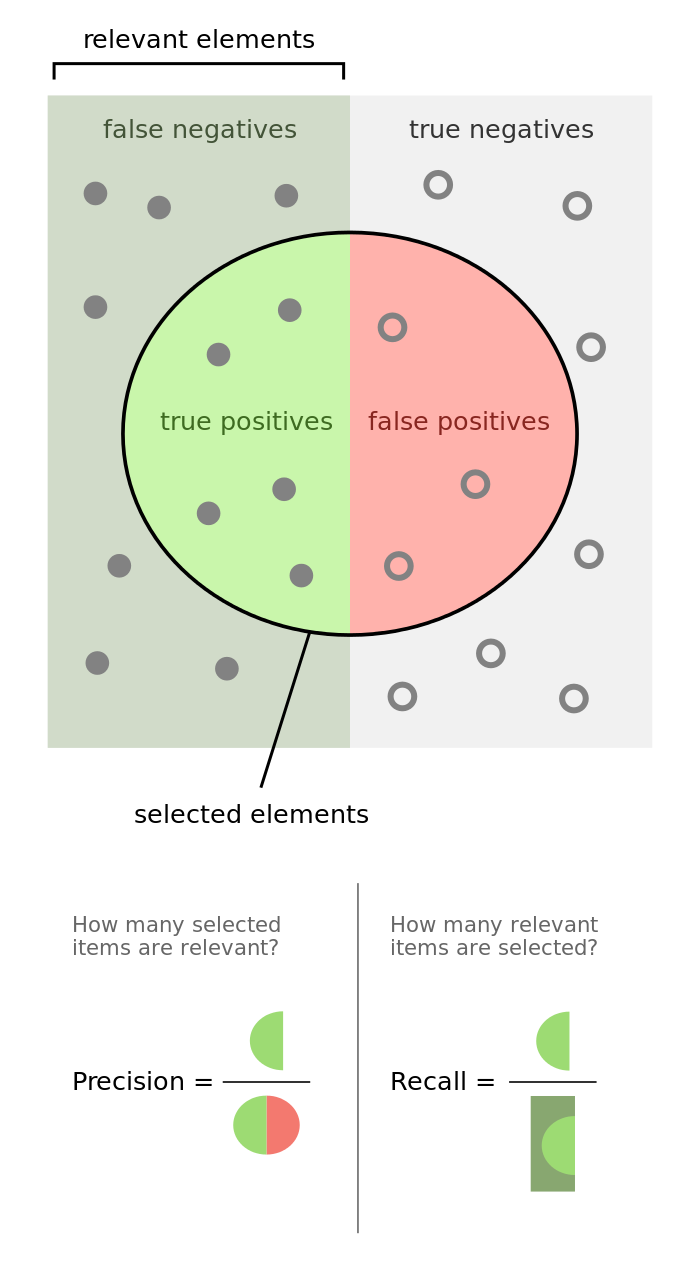


## **Baseline Models**

**Helper Function to Download Test Predictions as CSV**

In [ ]:
ss.head()

In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

### **Model A. (Predicting all instances as majority)**

In [ ]:
target = train[TARGET_COL]
target.value_counts()

As we saw before too, 0 is the majority class. Lets begin by predicting everything as 0.

In [ ]:
preds_target = np.zeros(len(train))

accuracy = accuracy_score(target, preds_target)
f1 = f1_score(target, preds_target)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

In [ ]:
preds_test = np.zeros(len(test))

In [ ]:
download_preds(preds_test, file_name = 'haklive_zero_sub.csv')

Had the metric been accuracy, we would have got an accuracy of almost 90 %, but F1-score is forcing us to create a better model.
There's no point submitting a model with train score of 0 to the leaderboard, but you are welcome to try

### **Model B. (Random Predictions with equal probability)**

In [ ]:
#### Since we are dealing with randomness, its important to set a seed, so we get same randomness everytime.
np.random.seed(2)

preds_target = np.random.choice([0, 1], size=len(train))


f1_score(target, preds_target)

Not an excellent score. Nevertheless it is much better than getting 0. Lets submit this on the leaderboard.

In [ ]:
np.random.seed(2)
preds_test = np.random.choice([0, 1], size=len(test))
download_preds(preds_test, file_name = 'haklive_random_sub.csv')

This scores 0.1897 on the leaderboard, quite similar to our train score.

###  **Rule Based: Classifying using Most Important Feature(s)**

We saw that balance and last_contact_duration could tell us a lot about the target.

Just to recap here were the plots that we got.

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
for i, c in enumerate(['balance', 'last_contact_duration']):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])

We had observe that customers subscribing a not subscribing a term deposit have a median account balance of approx 400 and median_last_contact_duration of around 150.

So initially we can classify all samples with balance < 400, and median_last_contact_duraiton < 150 as 0 or 'term_deposit_not_subscribed'



In [ ]:
def rule_based_clf(df):
  preds = np.ones(len(df))
  rule = (df['last_contact_duration'] < 200) | (df['balance'] < 400)
  preds[rule] = 0
  return preds

In [ ]:
preds_train = rule_based_clf(train)
f1_score(target, preds_train)

In [ ]:
preds_test = rule_based_clf(test)
download_preds(preds_test, file_name='hacklive_rule_based_2.csv')

This scores **0.30364** on the leaderboard. Again very close to our train score.

**Exercise**

* Try changing the thresholds from 150 and 400 to something else, how does the training score vary ? How does the test score vary ?
* Try analyzing the data to create more such rules to classify the examples.

# **Q/A Time**